In [49]:
import sys
sys.path.append("../")
import numpy as np

from soda.mechanism.util import (
    get_allocation_single_item
)

In [50]:
from soda.util.config import Config

In [85]:
config_game = {
    "mechanism": 'soda.mechanism.bertrand_pricing.BertrandPricing',
    
    "bidder": ['1', '1'], 
    "o_space": {'1': [0, 2]}, 
    "a_space": {'1': [0, 2]}, 

    "n": 64, 
    "m": 64,
    
    "param_prior": {
        'distribution': 'uniform',        
        },
    
    "param_util": {
        'tie_breaking': 'lose', 
        'demand': 'standard',
        'intercept': 2.0,
    },
}
config_learner = "../../configs/learner/sofw.yaml"

In [86]:
config = Config(config_game, config_learner)
game, learner = config.create_setting()
game.get_utility()

In [87]:
print(game.mechanism)

Mechanism(bertrand_pricing)
- bidder: ['1', '1'] 
- observation space:
   - 1: [0, 2]
- action space:
   - 1: [0, 2]
- prior
   - distribution: uniform
- utility
   - tie_breaking: lose
   - demand: standard
   - intercept: 2.0
   - slope: -1.0



In [88]:
index_agent = 0
bids_profile = np.array([
    [2, 1, 0.3, 0.1], 
    [3, 2, 0.4, 0.2],
])
game.mechanism.get_demand(bids_profile, index_agent=index_agent)


array([0. , 1. , 1.7, 1.9])

In [89]:
strategies = config.create_strategies(game)
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

  0%|                    | 0.00/1.00k [00:00<?, ?it/s]

 15%|███                 | 152/1.00k [00:00<00:00, 1.44kit/s]

Convergence after 152 iterations
Value of stopping criterion (util_loss) 0.0001


In [90]:
bne_uniform = lambda x: 1 / 6 + (2 / 3) * x

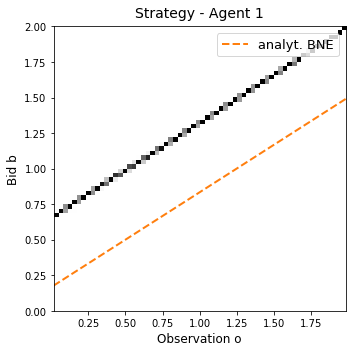

In [91]:
strategies['1'].plot(grad=False, metrics=False, beta=bne_uniform)

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution Observation')

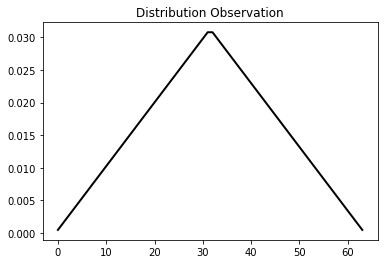

In [68]:
plt.plot(strategies['1'].x.sum(axis=1), color="k", linewidth=2)
plt.title("Distribution Observation")

In [38]:
n_obs = int(2**22)
obs = game.mechanism.sample_types(n_obs)
bids = np.array([strategies[agent].sample_bids(obs[i]) for i, agent in enumerate(game.bidder)])